# Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Data Pre-processing

## Exploratory Data Analysis

In [2]:
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data", names=["Gender", "Age", "Debt", "Married", "BankCustomer", "EducationLevel", 
"Ethnicity", "YearsEmployed", "PriorDefault", "Employed", "CreditScore", "DriversLicense", "Citizen", 
"ZipCode", "Income", "ApprovalStatus"], na_values=['?'])

df

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [3]:
# make a copy of the data to make sure that we wouldn't lose anything

df_original = df.copy()

In [4]:
# converting '-' & '+' to zeros & ones

df['ApprovalStatus'].replace('+', 1, inplace=True)
df['ApprovalStatus'].replace('-', 0, inplace=True)

In [5]:
df.describe(include='all')

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
count,678,678.000000,690.000000,684,684,681,681,690.000000,690,690,690.00000,690,690,677.000000,690.000000,690.000000
unique,2,NaN,NaN,3,3,14,9,NaN,2,2,NaN,2,3,NaN,NaN,NaN
top,b,NaN,NaN,u,g,c,v,NaN,t,f,NaN,f,g,NaN,NaN,NaN
freq,468,NaN,NaN,519,519,137,399,NaN,361,395,NaN,374,625,NaN,NaN,NaN
mean,NaN,31.568171,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,184.014771,1017.385507,0.444928
std,NaN,11.957862,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,173.806768,5210.102598,0.497318
min,NaN,13.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,22.602500,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,75.000000,0.000000,0.000000
50%,NaN,28.460000,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,160.000000,5.000000,0.000000
75%,NaN,38.230000,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,276.000000,395.500000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          678 non-null    object 
 1   Age             678 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         684 non-null    object 
 4   BankCustomer    684 non-null    object 
 5   EducationLevel  681 non-null    object 
 6   Ethnicity       681 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         677 non-null    float64
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    int64  
dtypes: float64(4), int64(3), object(9)
memory usage: 86.4+ KB


- as we found, there are some features like ('Gender', 'Age', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen', 'ZipCode', 'ApprovalStatus') need to be incoded as our model can handle only numerical data.

- There is no NaN values but we found unknown records which represented with '?'

- Features like 'Age' and 'ZipCode' are categorical beacouse they have unknown records but they are not categorical. We can't handle them as catigorical features because they have many unique values.

- There are outliers in some features like 'Debt' , 'YearsEmployed' , 'CreditScore' and 'Income' because there is a difference between the maximum value and 75% 

## Handle unknown values

In [7]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
df.loc[:, df.select_dtypes(include=np.number).columns] = imputer.fit_transform(df.loc[:, df.select_dtypes(include=np.number).columns]) 
df.isna().sum() 

for column in df.select_dtypes(include=object).columns:
    df[column] = df[column].fillna(value=df[column].mode()[0])

## Check for incosistency in data

In [8]:
df.dtypes

Gender             object
Age               float64
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore       float64
DriversLicense     object
Citizen            object
ZipCode           float64
Income            float64
ApprovalStatus    float64
dtype: object

In [9]:
df.applymap(type).apply(pd.value_counts).fillna(0)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
<class 'str'>,690.0,0.0,0.0,690.0,690.0,690.0,690.0,0.0,690.0,690.0,0.0,690.0,690.0,0.0,0.0,0.0
<class 'float'>,0.0,690.0,690.0,0.0,0.0,0.0,0.0,690.0,0.0,0.0,690.0,0.0,0.0,690.0,690.0,690.0


## Univariate analysis

### Dependent variable

In [10]:
df['ApprovalStatus'].value_counts()

0.0    383
1.0    307
Name: ApprovalStatus, dtype: int64

<AxesSubplot:>

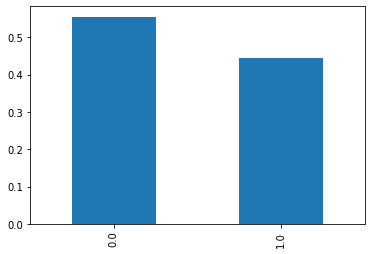

In [11]:
df['ApprovalStatus'].value_counts(normalize=True).plot.bar()

<AxesSubplot:ylabel='ApprovalStatus'>

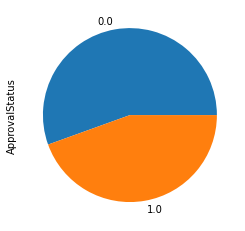

In [12]:
df['ApprovalStatus'].value_counts().plot(kind='pie')

- There are 383 out of 690 ( about 55% ) wasn't approved

### Independent Variables (Categorical)

<AxesSubplot:title={'center':'Citizen'}>

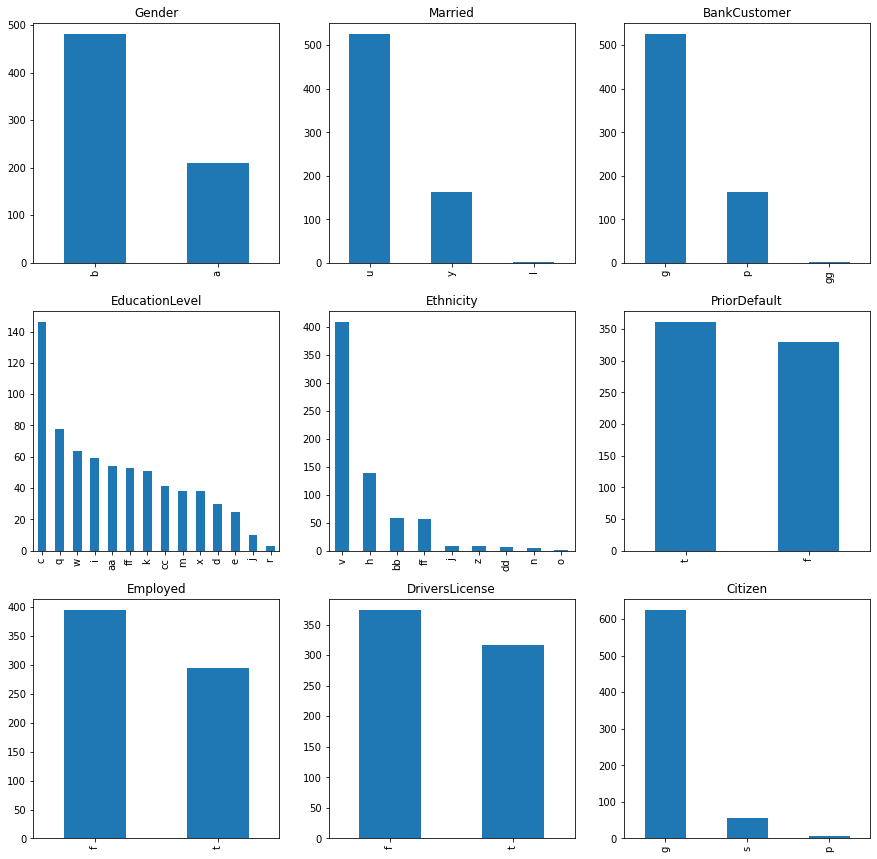

In [13]:
plt.subplot(3,3,1)
df['Gender'].value_counts().plot.bar(title='Gender', figsize=(15, 15))

plt.subplot(3,3,2)
df['Married'].value_counts().plot.bar(title='Married')

plt.subplot(3,3,3)
df['BankCustomer'].value_counts().plot.bar(title='BankCustomer')

plt.subplot(3,3,4)
df['EducationLevel'].value_counts().plot.bar(title='EducationLevel')

plt.subplot(3,3,5)
df['Ethnicity'].value_counts().plot.bar(title='Ethnicity')

plt.subplot(3,3,6)
df['PriorDefault'].value_counts().plot.bar(title='PriorDefault')

plt.subplot(3,3,7)
df['Employed'].value_counts().plot.bar(title='Employed')

plt.subplot(3,3,8)
df['DriversLicense'].value_counts().plot.bar(title='DriversLicense')

plt.subplot(3,3,9)
df['Citizen'].value_counts().plot.bar(title='Citizen')

### Independent Variable (Numerical)

<AxesSubplot:>

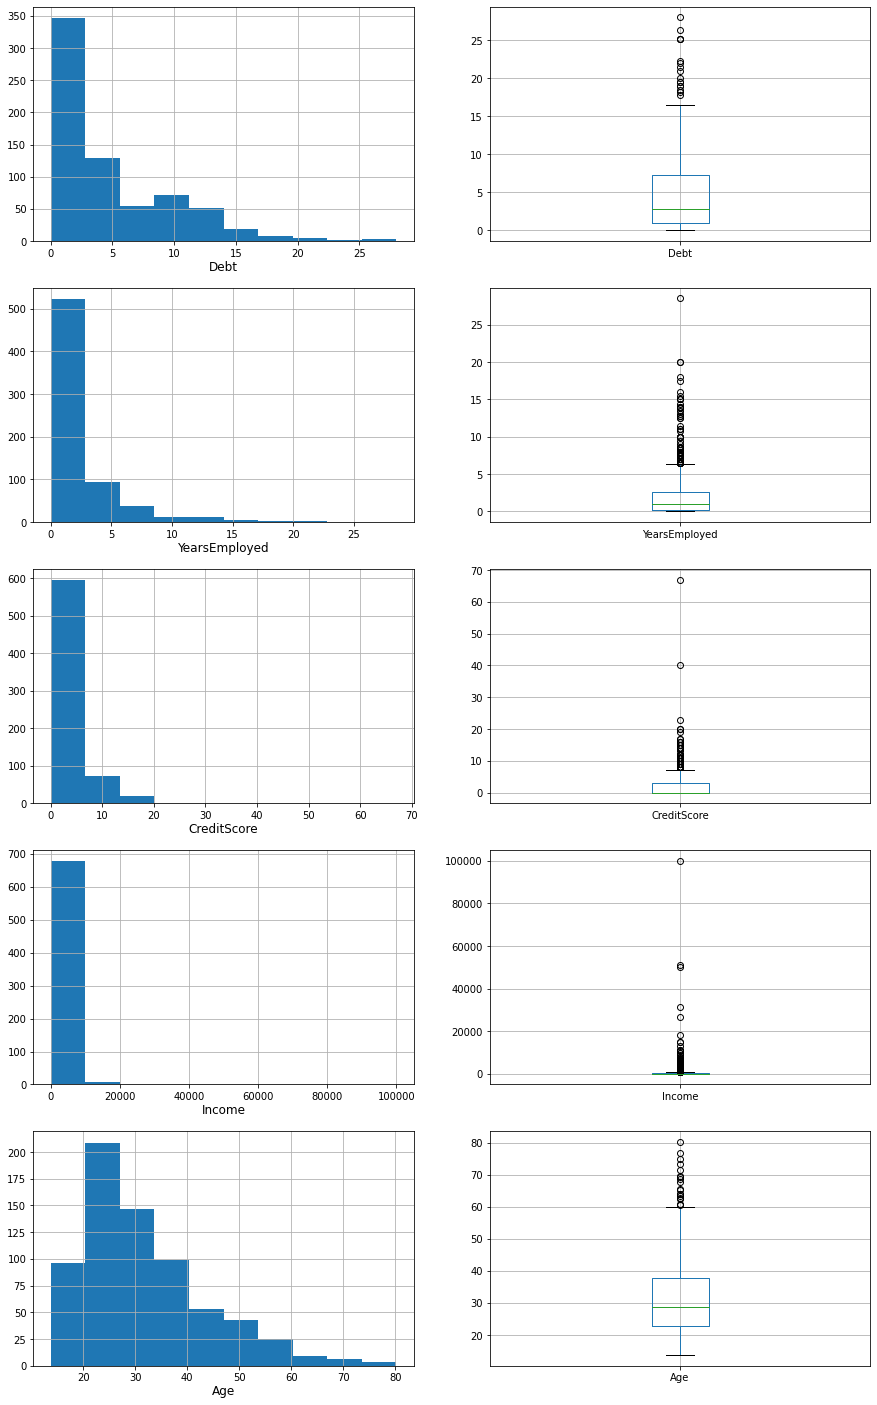

In [14]:
plt.subplot(5,2,1)
plt.title('Debt', y=-0.15)
df['Debt'].hist(figsize=(15, 25))

plt.subplot(5,2,2)
df.boxplot(column='Debt')

plt.subplot(5,2,3)
plt.title('YearsEmployed', y=-0.15)
df['YearsEmployed'].hist()

plt.subplot(5,2,4)
df.boxplot(column='YearsEmployed')

plt.subplot(5,2,5)
plt.title('CreditScore', y=-0.15)
df['CreditScore'].hist()

plt.subplot(5,2,6)
df.boxplot(column='CreditScore')

plt.subplot(5,2,7)
plt.title('Income', y=-0.15)
df['Income'].hist()

plt.subplot(5,2,8)
df.boxplot(column='Income')

plt.subplot(5,2,9)
plt.title('Age', y=-0.15)
df['Age'].hist()

plt.subplot(5,2,10)
df.boxplot(column='Age')

### Bivariate Analysis

<AxesSubplot:>

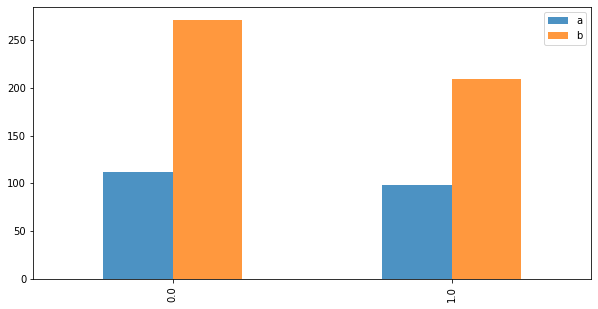

In [15]:
df_a = df.ApprovalStatus[df.Gender == 'a'].value_counts()
df_b = df.ApprovalStatus[df.Gender == 'b'].value_counts()
df_viz_1 = pd.DataFrame({'a': df_a, 'b': df_b})
df_viz_1.plot(kind='bar', alpha=0.8, stacked=False, figsize=(10,5))

<AxesSubplot:>

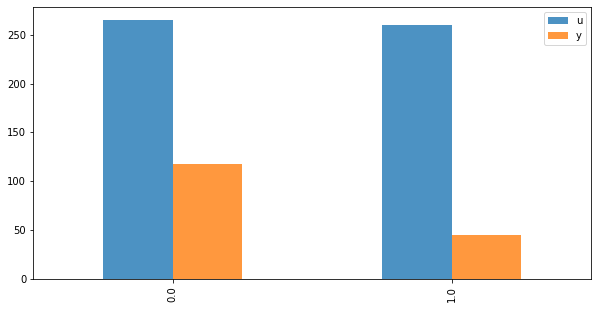

In [16]:
df_u = df.ApprovalStatus[df.Married == 'u'].value_counts()
df_y = df.ApprovalStatus[df.Married == 'y'].value_counts()
df_viz_2 = pd.DataFrame({'u': df_u, 'y': df_y})
df_viz_2.plot(kind='bar', alpha=0.8, stacked=False, figsize=(10,5))

<AxesSubplot:>

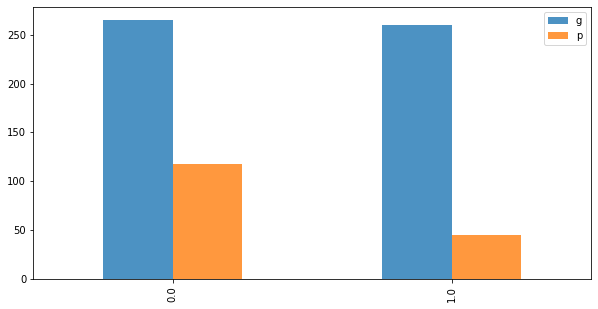

In [17]:
df_g = df.ApprovalStatus[df.BankCustomer == 'g'].value_counts()
df_p = df.ApprovalStatus[df.BankCustomer == 'p'].value_counts()
df_viz_3 = pd.DataFrame({'g': df_g, 'p': df_p})
df_viz_3.plot(kind='bar', alpha=0.8, stacked=False, figsize=(10,5))

<AxesSubplot:>

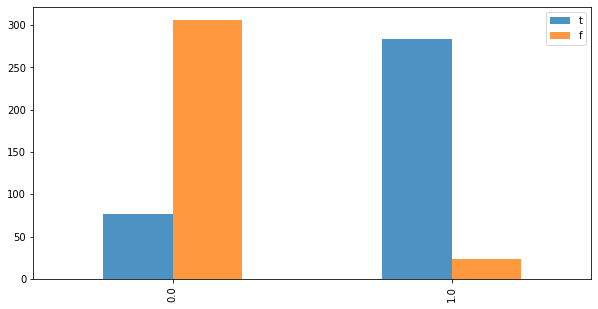

In [18]:
df_t = df.ApprovalStatus[df.PriorDefault == 't'].value_counts()
df_f = df.ApprovalStatus[df.PriorDefault == 'f'].value_counts()
df_viz_4 = pd.DataFrame({'t': df_t, 'f': df_f})
df_viz_4.plot(kind='bar', alpha=0.8, stacked=False, figsize=(10,5))

<AxesSubplot:>

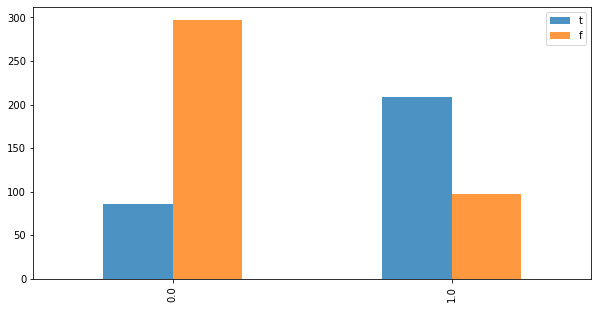

In [19]:
df_t = df.ApprovalStatus[df.Employed == 't'].value_counts()
df_f = df.ApprovalStatus[df.Employed == 'f'].value_counts()
df_viz_5 = pd.DataFrame({'t': df_t, 'f': df_f})
df_viz_5.plot(kind='bar', alpha=0.8, stacked=False, figsize=(10,5))

<AxesSubplot:>

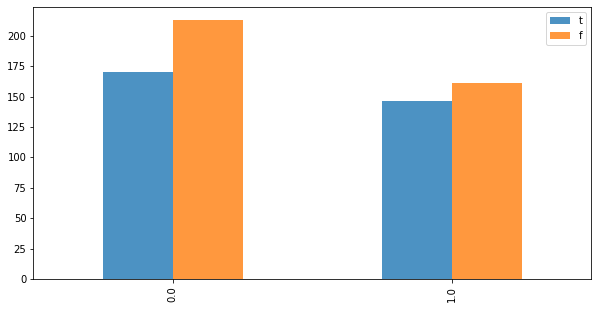

In [20]:
df_t = df.ApprovalStatus[df.DriversLicense == 't'].value_counts()
df_f = df.ApprovalStatus[df.DriversLicense == 'f'].value_counts()
df_viz_6 = pd.DataFrame({'t': df_t, 'f': df_f})
df_viz_6.plot(kind='bar', alpha=0.8, stacked=False, figsize=(10,5))

<AxesSubplot:>

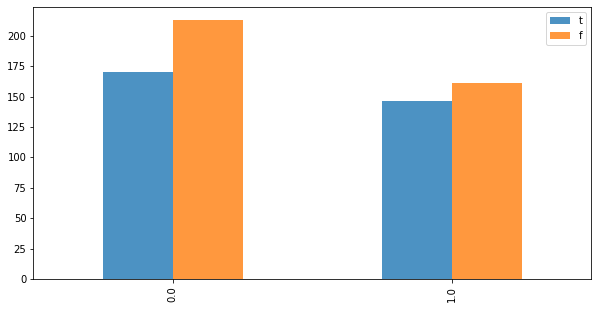

In [21]:
df_g = df.ApprovalStatus[df.Citizen == 'g'].value_counts()
df_s = df.ApprovalStatus[df.Citizen == 's'].value_counts()
df_viz_7 = pd.DataFrame({'t': df_t, 'f': df_f})
df_viz_7.plot(kind='bar', alpha=0.8, stacked=False, figsize=(10,5))

## Remove Unneeded Columns

In [22]:
df = df.drop(['ZipCode'], axis=1)
df

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,0.0,1.0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,560.0,1.0
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,824.0,1.0
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,3.0,1.0
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0.0,f,g,0.0,0.0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2.0,t,g,394.0,0.0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1.0,t,g,1.0,0.0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0.0,f,g,750.0,0.0


## Check for outliers

In [23]:
for col in df.select_dtypes(include=np.number).columns:
    print(f"Skewness of {col} is {df[col].skew()}")

Skewness of Age is 1.1559430819452812
Skewness of Debt is 1.4888131246649208
Skewness of YearsEmployed is 2.891330424153805
Skewness of CreditScore is 5.152519857445985
Skewness of Income is 13.140655014445459
Skewness of ApprovalStatus is 0.22212157058948015


In [24]:
df.describe()

,Age,Debt,YearsEmployed,CreditScore,Income,ApprovalStatus
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,1017.385507,0.444928
std,11.853273,4.978163,3.346513,4.86294,5210.102598,0.497318
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,0.000000,0.000000
50%,28.625000,2.750000,1.000000,0.00000,5.000000,0.000000
75%,37.707500,7.207500,2.625000,3.00000,395.500000,1.000000
max,80.250000,28.000000,28.500000,67.00000,100000.000000,1.000000


In [25]:
from scipy.stats import zscore

def filter_zscore(df, column_name):
    print(f"====== {column_name} ======")
    print(f"Mean of values is: {df[column_name].mean()}")
    print(f"Stanndard Deviation of values is: {df[column_name].std()}\n")
    print(f"length of data before filtering is {len(df)}")        
    filtered = df[(np.abs(zscore(df[column_name], nan_policy='omit')) < 3)]
    print(f"length of data after filtering is {len(filtered)}")
    return filtered.index.tolist()

index_set = set(df.index.tolist())
for col in df.select_dtypes(include=np.number).columns:
    index_set = set(filter_zscore(df, col)).intersection(index_set)

df = df.loc[set(index_set)]
df

====== Age ======
Mean of values is: 31.56817109144543
Stanndard Deviation of values is: 11.853272770556957

length of data before filtering is 690
length of data after filtering is 681
====== Debt ======
Mean of values is: 4.758724637681159
Stanndard Deviation of values is: 4.978163248528541

length of data before filtering is 690
length of data after filtering is 680
====== YearsEmployed ======
Mean of values is: 2.223405797101449
Stanndard Deviation of values is: 3.3465133592781324

length of data before filtering is 690
length of data after filtering is 668
====== CreditScore ======
Mean of values is: 2.4
Stanndard Deviation of values is: 4.862940034226996

length of data before filtering is 690
length of data after filtering is 682
====== Income ======
Mean of values is: 1017.3855072463768
Stanndard Deviation of values is: 5210.10259830269

length of data before filtering is 690
length of data after filtering is 684
====== ApprovalStatus ======
Mean of values is: 0.444927536231884

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,0.0,1.0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,560.0,1.0
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,824.0,1.0
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,3.0,1.0
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0.0,f,g,0.0,0.0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2.0,t,g,394.0,0.0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1.0,t,g,1.0,0.0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0.0,f,g,750.0,0.0


## Encoding Categorical Features

In [26]:
import category_encoders as ce

enc = ce.OrdinalEncoder(cols=['EducationLevel', 'Ethnicity', 'Gender', 'Married', 'BankCustomer', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen'])

df = enc.fit_transform(df)
df

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,ApprovalStatus
0,1,30.83,0.000,1,1,1,1,1.25,1,1,1.0,1,1,0.0,1.0
1,2,58.67,4.460,1,1,2,2,3.04,1,1,6.0,1,1,560.0,1.0
2,2,24.50,0.500,1,1,2,2,1.50,1,2,0.0,1,1,824.0,1.0
3,1,27.83,1.540,1,1,1,1,3.75,1,1,5.0,2,1,3.0,1.0
4,1,20.17,5.625,1,1,1,1,1.71,1,2,0.0,1,2,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,2,2,10,2,1.25,2,2,0.0,1,1,0.0,0.0
686,2,22.67,0.750,1,1,6,1,2.00,2,1,2.0,2,1,394.0,0.0
687,2,25.25,13.500,2,2,12,4,2.00,2,1,1.0,2,1,1.0,0.0
688,1,17.92,0.205,1,1,11,1,0.04,2,2,0.0,1,1,750.0,0.0


## Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df.loc[:, ['Age', 'Debt', 'YearsEmployed', 'Income']] = scaler.fit_transform(df.loc[:, ['Age', 'Debt', 'YearsEmployed', 'Income']]) 
df

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,ApprovalStatus
0,1,0.047552,-0.999263,1,1,1,1,-0.236465,1,1,1.0,1,1,-0.357929,1.0
1,2,2.713893,0.036191,1,1,2,2,0.559228,1,1,6.0,1,1,-0.015312,1.0
2,2,-0.558696,-0.883181,1,1,2,2,-0.125334,1,2,0.0,1,1,0.146208,1.0
3,1,-0.239770,-0.641730,1,1,1,1,0.874838,1,1,5.0,2,1,-0.356094,1.0
4,1,-0.973397,0.306662,1,1,1,1,-0.031985,1,2,0.0,1,2,-0.357929,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,-0.886243,1.342116,2,2,10,2,-0.236465,2,2,0.0,1,1,-0.357929,0.0
686,2,-0.733962,-0.825140,1,1,6,1,0.096926,2,1,2.0,2,1,-0.116873,0.0
687,2,-0.486866,2.134957,2,2,12,4,0.096926,2,1,1.0,2,1,-0.357317,0.0
688,1,-1.188888,-0.951669,1,1,11,1,-0.774335,2,2,0.0,1,1,0.100934,0.0


In [28]:
X = df.loc[:, df.columns != 'ApprovalStatus']
Y = df['ApprovalStatus']

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Generate models

## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold 
from sklearn import metrics
from sklearn.metrics import accuracy_score

kf = KFold(n_splits=5, random_state=None)

logreg_1 = LogisticRegression()

total_acc = []

for train_index , val_index in kf.split(x_train):
    X_train , X_val = x_train.iloc[train_index,:],x_train.iloc[val_index,:]
    Y_train , Y_val = y_train.iloc[train_index] , y_train.iloc[val_index]
    
    logreg_1.fit(X_train, Y_train)
    Y_pred = logreg_1.predict(X_val)
    
    acc = accuracy_score(Y_pred , Y_val)
    total_acc.append(acc)
    
avg_acc = sum(total_acc)/5

print(avg_acc)

y_pred = logreg_1.predict(x_test)
print(f"{accuracy_score(y_pred , y_test)}")

0.8612972508591064
0.8703703703703703


## SVM

In [31]:
from sklearn.svm import SVC

SVM_1 = SVC(kernel='rbf')
SVM_1.fit(x_train, y_train)

y_pred = SVM_1.predict(x_test)
print(f"{accuracy_score(y_pred , y_test)}")

0.8703703703703703


## KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn_1 = KNeighborsClassifier()
total_acc = []

for train_index , val_index in kf.split(x_train):
    X_train , X_val = x_train.iloc[train_index,:],x_train.iloc[val_index,:]
    Y_train , Y_val = y_train.iloc[train_index] , y_train.iloc[val_index]
    
    knn_1.fit(X_train, Y_train)
    Y_pred = knn_1.predict(X_val)
    
    acc = accuracy_score(Y_pred , Y_val)
    total_acc.append(acc)
    
avg_acc = sum(total_acc)/5

print(avg_acc)

y_pred = knn_1.predict(x_test)
print(f"{accuracy_score(y_pred , y_test)}")

0.8013960481099656
0.8580246913580247


## Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

total_acc = []

for train_index , val_index in kf.split(x_train):
    X_train , X_val = x_train.iloc[train_index,:],x_train.iloc[val_index,:]
    Y_train , Y_val = y_train.iloc[train_index] , y_train.iloc[val_index]
    
    dt.fit(X_train, Y_train)
    Y_pred = dt.predict(X_val)
    
    acc = accuracy_score(Y_pred , Y_val)
    total_acc.append(acc)
    
avg_acc = sum(total_acc)/5

print(avg_acc)

y_pred = dt.predict(x_test)
print(f"{accuracy_score(y_pred , y_test)}")

0.8220360824742267
0.8271604938271605


<AxesSubplot:>

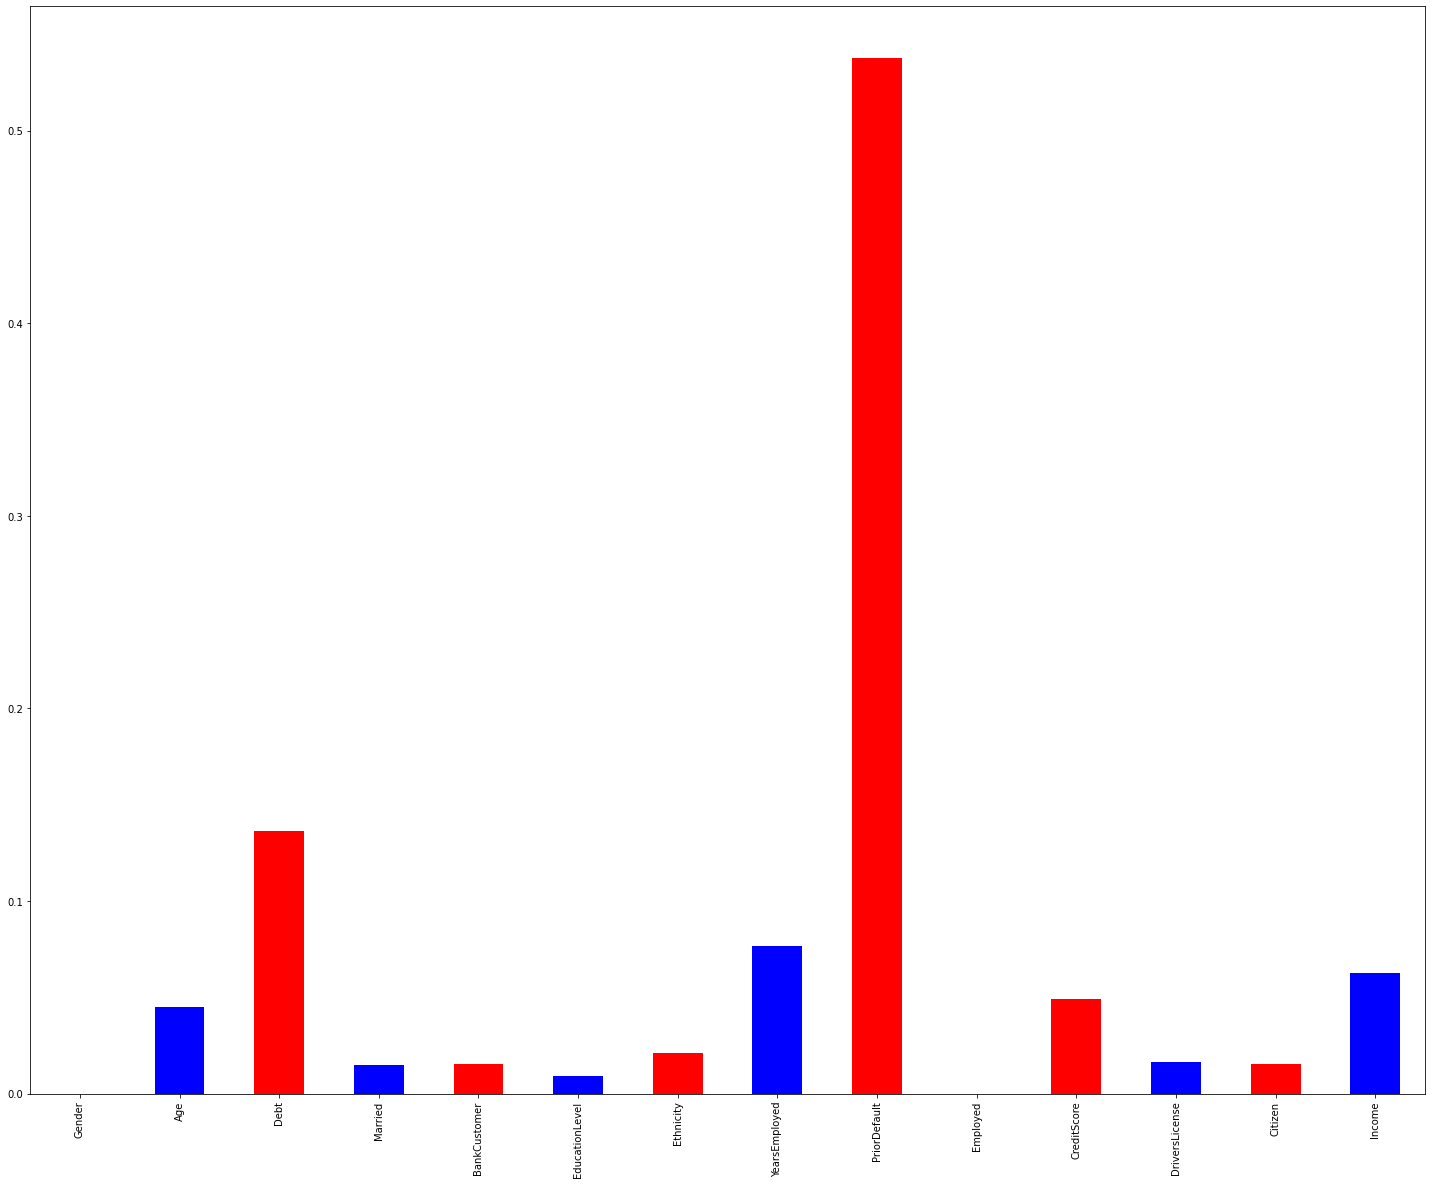

In [34]:
plt.figure(figsize=(25,20))
pd.Series(dt.feature_importances_, index=x_train.columns).plot(kind='bar', color=['red', 'blue'])

## Random forest

In [35]:
from sklearn.ensemble import RandomForestClassifier as RandomForestClassifierScikit

RF_1 = RandomForestClassifierScikit()
total_acc = []

for train_index , val_index in kf.split(x_train):
    X_train , X_val = x_train.iloc[train_index,:],x_train.iloc[val_index,:]
    Y_train , Y_val = y_train.iloc[train_index] , y_train.iloc[val_index]
    
    RF_1.fit(X_train, Y_train)
    Y_pred = RF_1.predict(X_val)
    
    acc = accuracy_score(Y_pred , Y_val)
    total_acc.append(acc)
    
avg_acc = sum(total_acc)/5

print(avg_acc)

y_pred = RF_1.predict(x_test)
print(f"{accuracy_score(y_pred , y_test)}")

0.867504295532646
0.8765432098765432


<AxesSubplot:>

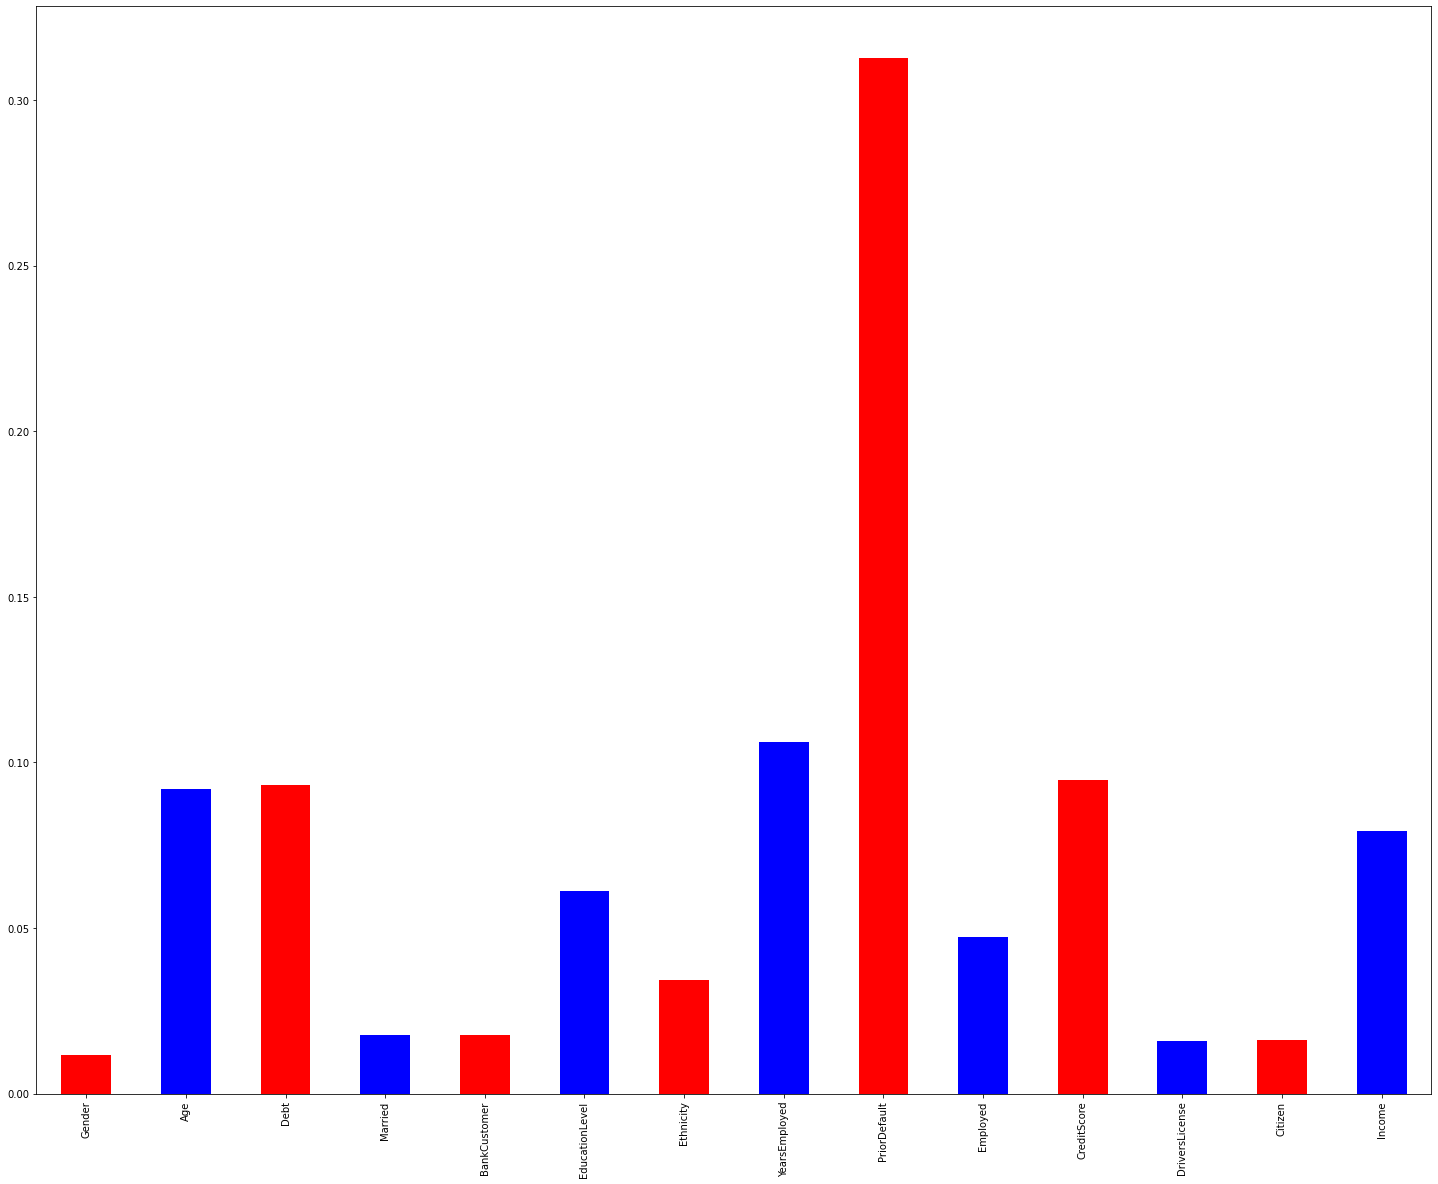

In [36]:
plt.figure(figsize=(25,20))
pd.Series(RF_1.feature_importances_, index=x_train.columns).plot(kind='bar', color=['red', 'blue'])

# Ensembling

In [40]:
from sklearn.ensemble import VotingClassifier

eclf_1 = VotingClassifier(estimators=[('rf', RF_1), ('knn', knn_1),
                                    ('logreg', logreg_1), ('SVM', SVM_1)],
                        voting='hard', weights=[1, 1, 1, 1])

eclf_1.fit(x_train, y_train)
print(eclf_1.score(x_test, y_test))

0.8950617283950617


# After removing features with low importance

In [41]:
x_train = x_train.drop(['Gender', 'DriversLicense', 'Married', 'Citizen', 'BankCustomer'], axis=1)
x_test = x_test.drop(['Gender', 'DriversLicense', 'Married', 'Citizen', 'BankCustomer'], axis=1)

## Logistic Regression

In [42]:
logreg_2 = LogisticRegression()

total_acc = []

for train_index , val_index in kf.split(x_train):
    X_train , X_val = x_train.iloc[train_index,:],x_train.iloc[val_index,:]
    Y_train , Y_val = y_train.iloc[train_index] , y_train.iloc[val_index]
    
    logreg_2.fit(X_train, Y_train)
    Y_pred = logreg_2.predict(X_val)
    
    acc = accuracy_score(Y_pred , Y_val)
    total_acc.append(acc)
    
avg_acc = sum(total_acc)/5

print(avg_acc)

y_pred = logreg_2.predict(x_test)
print(f"{accuracy_score(y_pred , y_test)}")

0.8509450171821307
0.8518518518518519


## KNN

In [43]:
from sklearn.model_selection import GridSearchCV
from time import perf_counter

params = dict()
params['n_neighbors'] = list(range(1, 20))
params['weights'] = ['uniform', 'distance']
params['metric'] = ['euclidean', 'manhattan', 'minkowski']

gs = GridSearchCV(KNeighborsClassifier(), param_grid=params, n_jobs= -1)

start_time = perf_counter()
gs.fit(x_train, y_train)
end_time = perf_counter()

# summarize result
print("Best Score:", gs.best_score_)
print("Best Hyperparameters:", gs.best_params_)
print("Grid Search Time is: %f seconds" % (end_time-start_time))

Best Score: 0.83034793814433
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Grid Search Time is: 5.855392 seconds


In [44]:
knn_2 = KNeighborsClassifier(n_neighbors=17, metric='manhattan', weights='distance')
total_acc = []

for train_index , val_index in kf.split(x_train):
    X_train , X_val = x_train.iloc[train_index,:],x_train.iloc[val_index,:]
    Y_train , Y_val = y_train.iloc[train_index] , y_train.iloc[val_index]
    
    knn_2.fit(X_train, Y_train)
    Y_pred = knn_2.predict(X_val)
    
    acc = accuracy_score(Y_pred , Y_val)
    total_acc.append(acc)
    
avg_acc = sum(total_acc)/5

print(avg_acc)

y_pred = knn_2.predict(x_test)
print(f"{accuracy_score(y_pred , y_test)}")

0.8220360824742267
0.845679012345679


## SVM

In [45]:
SVM_2 = SVC(kernel='rbf')
SVM_2.fit(x_train, y_train)

y_pred = SVM_2.predict(x_test)
print(f"{accuracy_score(y_pred , y_test)}")

0.8580246913580247


## Random forest

In [46]:
params = dict()
params['n_estimators'] = list(range(1, 10))
params['max_features'] = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]
params['max_depth'] = list(range(1, 10))
params['min_samples_split'] = list(range(10, 20))

gs = GridSearchCV(RandomForestClassifierScikit(), param_grid=params, n_jobs=-1)
start_time = perf_counter()
gs.fit(x_train, y_train)
end_time = perf_counter()

print("Best Score:", gs.best_score_)
print("Best Hyperparameters:", gs.best_params_)
print("Grid Search Time is: %f seconds" % (end_time-start_time))

Best Score: 0.8799828178694158
Best Hyperparameters: {'max_depth': 7, 'max_features': 0.6, 'min_samples_split': 16, 'n_estimators': 6}
Grid Search Time is: 109.730493 seconds


In [47]:
RF_2 = RandomForestClassifierScikit(max_depth= 7, max_features= 0.6, min_samples_split= 16, n_estimators= 6)
total_acc = []

for train_index , val_index in kf.split(x_train):
    X_train , X_val = x_train.iloc[train_index,:],x_train.iloc[val_index,:]
    Y_train , Y_val = y_train.iloc[train_index] , y_train.iloc[val_index]
    
    RF_2.fit(X_train, Y_train)
    Y_pred = RF_2.predict(X_val)
    
    acc = accuracy_score(Y_pred , Y_val)
    total_acc.append(acc)
    
avg_acc = sum(total_acc)/5

print(avg_acc)

print(RF_2.score(x_test,y_test))

0.861340206185567
0.8827160493827161


# Ensembling

In [51]:
eclf_2 = VotingClassifier(estimators=[('rf', RF_2), ('knn', knn_2),
                                    ('logreg', logreg_2), ('SVM', SVM_2)],
                        voting='hard', weights=[1, 1, 1, 1])

eclf_2.fit(x_train, y_train)
print(eclf_2.score(x_test, y_test))

0.9074074074074074
